In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import math
import re
from re import X
from scipy.optimize import minimize



def lire():
    with open('hamza.txt', 'r') as file:
        lines = file.read()
        

        
    lines = lines.replace("|", ".")
    lines = lines.replace(":", ".")
    lines = lines.replace("53L5A1", "")

    lines = lines.replace("X", "0")

    lines = re.sub(r'[^0-9.]', '', lines)


    lines = lines.split('.')

    lines = [i for i in lines if i != '']   

    res=[eval(i) for i in lines]

    #print(res)

    n = len(res)//4

    data = np.zeros((n, 4), dtype = int)

    up = []
    down = []

    for i in range(len(res)):
        j = i%32
        if j >= 16:
            
            down.append(res[i])
        else:
            up.append(res[i])

    print(len(up)/64, len(down)/64)
    # assert len(up) == len(down) 
    #print(up)
    #print(down)

    for i in range(len(up)):
        
        if i%2 == 0:
            data[i//2, 0] = up[i]
            data[i//2, 2] = down[i]
        else:
            data[i//2, 1] = up[i]
            data[i//2, 3] = down[i]
        
    #print('resultat',data.reshape(-1,64,4))
    #print("mes resultat",data)
    return data
Data=lire()


2.0 2.0


In [65]:

Data=lire()
n=len(Data)
print(n)
i=0
myList=[]
while i < n-8:
    Matrix8X8=np.empty((8, 8) , dtype=object)
    for j in range(8):
        for k in range(8):
            Matrix8X8[j,k]= (Data[i]) 
            i=i+1  
            
    myList.append(Matrix8X8)
    #print ("*******************ma matrice" ,i/64, "********************\n", myList,"\n","*******************************\n")
    #print("la matrice\n", Matrix8X8)
    #print("la listeest ",int ((i-64)/64)) #,Matrix8X8[0][0][0])             
    #return myList          
#print("myliste est ",(myList))
#print("myliste est \n",(myList))
num_matrice=0
num_line=7
num_colon=7
#print("test",(myList[num_matrice][num_line][num_colon])[0])


2.0 2.0
64


In [66]:

def chgt_coord(mat):
    
    mat_x = [[0 for _ in range(8)] for _ in range(8)]
    mat_y = [[0 for _ in range(8)] for _ in range(8)]
    mat_z = [[0 for _ in range(8)] for _ in range(8)]
    mat_dec = [-7,-5,-3,-1,1,3,5,7]
    angle = 4 #64/8/2
    for i in range(8) :
        for j in range(8):
            R = mat[i][j][0]
            B = math.sin((math.pi*(-mat_dec[j])*angle)/180)
            A = math.cos((math.pi*(-mat_dec[j])*angle)/180)
            C = math.sin((math.pi*mat_dec[i]*angle)/180)
            D = math.cos((math.pi*mat_dec[i]*angle)/180)
            mat_x[i][j] = R*A*D
            #mat_x[i][j] = 1
            mat_y[i][j] = R*A*C
            #mat_y[i][j] = 1
            mat_z[i][j] = R*B
            #mat_z[i][j] = 1
    print("matr_x",mat_x)
    print("matr_y",mat_y)
    print("matr_z",mat_z)       
    return [mat_x,mat_y,mat_z]

    

matr_x [[916.0258307890639, 962.4512315582487, 995.7919891665317, 1019.081870872737, 1009.3931063268424, 988.8827646103026, 962.4512315582487, 905.1114804647685], [958.3027348704975, 1009.2943992424961, 1057.0317948163479, 1078.0141133090287, 1078.9515168858193, 1055.19347865145, 999.5811548053416, 958.3027348704975], [988.8827646103026, 1048.759372074307, 1120.380865449743, 1135.7903230436955, 1127.008439102636, 1107.942819975066, 1050.597688239205, 989.7464176798312], [1017.320277318938, 1067.7026739643336, 1139.6933825730553, 1146.3944075951442, 1151.3700777669983, 1126.032674220296, 1061.1408489268006, 1008.5123095499429], [1004.1083256654454, 1071.4522882714957, 1123.1053795732762, 1155.3506139044814, 1159.3311500419645, 1116.2750253968968, 1075.2019025786576, 1004.1083256654454], [982.837193123602, 1049.6785301567559, 1097.4183199580318, 1133.8387932790156, 1132.8630283966756, 1103.1589563309594, 1047.840213991858, 986.2918054017166], [962.4512315582488, 1005.762310356258, 1056.1

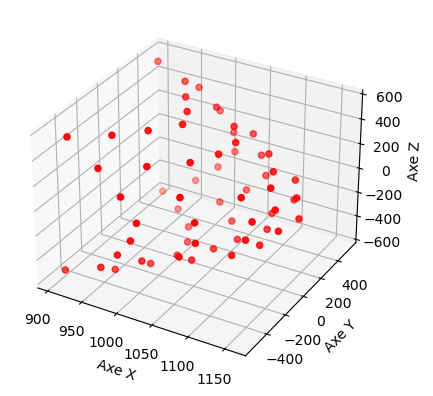

In [90]:


def visualisation_3D(mat_xyz):
    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez les données en 3D
    ax.scatter(mat_xyz[0], mat_xyz[1], mat_xyz[2], c='r', marker='o')

    # Étiquetez les axes
    ax.set_xlabel('Axe X')
    ax.set_ylabel('Axe Y')
    ax.set_zlabel('Axe Z')

    # Affichez la figure
    plt.show()
visualisation_3D(chgt_coord(myList[0]))

In [96]:

def chgt_coord1(mat):
    mat_x = [[0 for _ in range(8)] for _ in range(8)]
    mat_y = [[0 for _ in range(8)] for _ in range(8)]
    mat_z = [[0 for _ in range(8)] for _ in range(8)]

    # Angle de transformation (64 degrés divisé par 8, puis divisé par 2)
    
    angle = 9.25*(math.pi/180)

    # Décalage en déclinaison
    mat_dec_phi = [-4, -3, -2, -1, 1, 2, 3, 5]
    mat_dec_theta = [8, 7, 6, 5, 4, 3, 2, 1]

    for i in range(8):
        for j in range(8):
            # R est la valeur de la distance radiale dans le repère polaire
            R = mat[i][j][0]
            # Calcul des coordonnées cartésiennes
            A = math.sin(math.radians(mat_dec_theta[i] * angle))
            B = math.cos(math.radians(mat_dec_theta[i] * angle))
            C = math.sin(math.radians(mat_dec_phi[j] * angle))
            D = math.cos(math.radians(mat_dec_phi[j] * angle))

            mat_x[i][j] = R * A * D
            mat_y[i][j] = R * A * C
            mat_z[i][j] = R * B

    return [mat_x, mat_y, mat_z]
chgt_coord1(myList[0])


[[[26.482559466710004,
   26.145210782705984,
   25.987953790911245,
   26.078422054189517,
   25.830485457304395,
   25.807638413350716,
   26.145210782705984,
   26.166087665562287],
  [22.778270563936807,
   22.542239628524776,
   22.680743776968686,
   22.681013890876986,
   22.700736511651662,
   22.641299005182656,
   22.32529768984256,
   22.77745671837193],
  [19.35552390603212,
   19.288442357343392,
   19.795981009165878,
   19.67787900694743,
   19.525730457924638,
   19.576213500097428,
   19.322252072255473,
   19.371736135606607],
  [16.270709986818765,
   16.045760762062205,
   16.454627369904426,
   16.229414795711545,
   16.299854964095708,
   16.257397247319958,
   15.947147658168932,
   16.12926173537654],
  [12.847674658771663,
   12.881842299470062,
   12.972261410281961,
   13.085121513710861,
   13.130203758374808,
   12.893368421687716,
   12.926923112416588,
   12.847215623788708],
  [9.618940256972568,
   9.653018485804807,
   9.695474583775908,
   9.822385038

matr_x [[916.0258307890639, 962.4512315582487, 995.7919891665317, 1019.081870872737, 1009.3931063268424, 988.8827646103026, 962.4512315582487, 905.1114804647685], [958.3027348704975, 1009.2943992424961, 1057.0317948163479, 1078.0141133090287, 1078.9515168858193, 1055.19347865145, 999.5811548053416, 958.3027348704975], [988.8827646103026, 1048.759372074307, 1120.380865449743, 1135.7903230436955, 1127.008439102636, 1107.942819975066, 1050.597688239205, 989.7464176798312], [1017.320277318938, 1067.7026739643336, 1139.6933825730553, 1146.3944075951442, 1151.3700777669983, 1126.032674220296, 1061.1408489268006, 1008.5123095499429], [1004.1083256654454, 1071.4522882714957, 1123.1053795732762, 1155.3506139044814, 1159.3311500419645, 1116.2750253968968, 1075.2019025786576, 1004.1083256654454], [982.837193123602, 1049.6785301567559, 1097.4183199580318, 1133.8387932790156, 1132.8630283966756, 1103.1589563309594, 1047.840213991858, 986.2918054017166], [962.4512315582488, 1005.762310356258, 1056.1

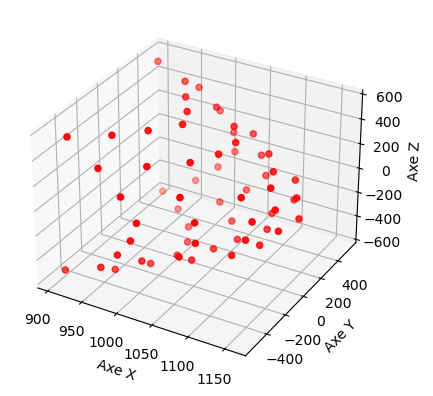

In [114]:
visualisation_3D(chgt_coord(myList[0]))

64


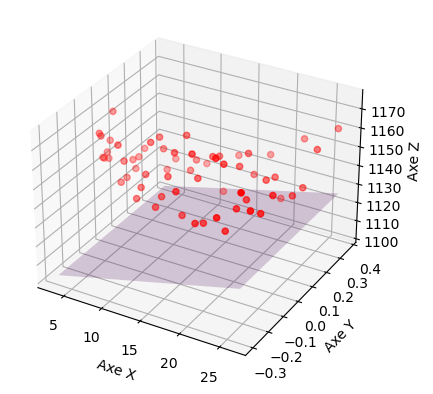

In [120]:


# Vos données en coordonnées cartésiennes (x, y, z)
data = np.array(chgt_coord1(myList[0]))  # Remplacez ceci par vos propres données

# Modèle de plan : z = ax + by + c
def plane(params, data):
    a, b, c = params
    x, y, z = data
    return a * x + b * y + c

# Fonction d'erreur à minimiser
def error(params, data):
    return np.sum((plane(params, data) - data[0]) ** 2)

# Estimation des coefficients du plan
initial_guess = [0, 0, 0]  # Vous pouvez initialiser les valeurs ici
result = minimize(error, initial_guess, args=(data,), method='BFGS')
a, b, c = result.x

# Création du plan
x_range = np.linspace(np.min(data[0]), np.max(data[0]), 64)
print(len(x_range))
y_range = np.linspace(np.min(data[1]), np.max(data[1]), 64)
z_range=np.linspace(np.min(data[2]), np.max(data[2]), 64)
xx, yy = np.meshgrid(x_range, y_range)
#yy, zz = np.meshgrid(y_range, z_range)
#xx = a * yy + b * zz + c
zz = a * xx + b * yy + c

# Tracé du plan et des points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.2, rstride=64, cstride=64, cmap='viridis')
ax.scatter(data[0], data[1], data[2], c='r', marker='o')

# Étiquetage des axes
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')

plt.show()


In [ ]:
data = np.array(chgt_coord1(myList[0]))
data1=np.array(chgt_coord(myList[0]))
# Modèle de plan : z = ax + by + c
def plane(params, data):
    a, b, c = params
    x, y, z = data
    return a * x + b * y + c

# Fonction d'erreur à minimiser
def error(params, data):
    return np.sum((plane(params, data) - data[2]) ** 2)

# Estimation des coefficients du plan
initial_guess = [0, 0, 0]  # Vous pouvez initialiser les valeurs ici
result = minimize(error, initial_guess, args=(data,), method='BFGS')
a, b, c = result.x


# Création du plan
x_range = np.linspace(np.min(data[0]), np.max(data[0]), 64)
y_range = np.linspace(np.min(data[1]), np.max(data[1]), 64)
xx, yy = np.meshgrid(x_range, y_range)
zz  = a * xx + b * yy + c 
print(f"Coefficient a : {a}")
print(f"Coefficient b : {b}")
print(f"Coefficient c : {c}")
# Tracé du plan et des points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=6400, cstride=6400, cmap='viridis')
ax.scatter(data[0], data[1], zz, c='r', marker='o')

# Étiquetage des axes
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')

plt.show()


matr_x [[916.0258307890639, 962.4512315582487, 995.7919891665317, 1019.081870872737, 1009.3931063268424, 988.8827646103026, 962.4512315582487, 905.1114804647685], [958.3027348704975, 1009.2943992424961, 1057.0317948163479, 1078.0141133090287, 1078.9515168858193, 1055.19347865145, 999.5811548053416, 958.3027348704975], [988.8827646103026, 1048.759372074307, 1120.380865449743, 1135.7903230436955, 1127.008439102636, 1107.942819975066, 1050.597688239205, 989.7464176798312], [1017.320277318938, 1067.7026739643336, 1139.6933825730553, 1146.3944075951442, 1151.3700777669983, 1126.032674220296, 1061.1408489268006, 1008.5123095499429], [1004.1083256654454, 1071.4522882714957, 1123.1053795732762, 1155.3506139044814, 1159.3311500419645, 1116.2750253968968, 1075.2019025786576, 1004.1083256654454], [982.837193123602, 1049.6785301567559, 1097.4183199580318, 1133.8387932790156, 1132.8630283966756, 1103.1589563309594, 1047.840213991858, 986.2918054017166], [962.4512315582488, 1005.762310356258, 1056.1

: 

La fonction des moindres carrés est une technique utilisée pour trouver la meilleure approximation linéaire d'un modèle en ajustant les coefficients d'un modèle linéaire aux données observées. Si vous avez un modèle de la forme `y = ax + bz + c`, vous pouvez utiliser la méthode des moindres carrés pour ajuster les coefficients `a`, `b`, et `c` aux données que vous avez.

Voici comment vous pouvez le faire :

1. Collectez vos données : Vous devez avoir un ensemble de données avec des valeurs pour `y`, `x`, `z`.

2. Définissez votre modèle : Vous avez déjà défini votre modèle comme `y = ax + bz + c`.

3. Définissez votre fonction d'erreur : Pour la méthode des moindres carrés, vous devez définir une fonction d'erreur qui mesure la différence entre les valeurs prédites par votre modèle et les valeurs réelles de `y`. La fonction d'erreur la plus couramment utilisée est la somme des carrés des résidus. Elle est définie comme suit :

   E(a, b, c) = Σ(y_i - (ax_i + bz_i + c))^2

   où Σ représente la somme sur toutes les données, et (x_i, z_i, y_i) sont les données individuelles.

4. Minimisez la fonction d'erreur : Pour ajuster les coefficients `a`, `b`, et `c` à vos données, vous devez minimiser la fonction d'erreur. Cela peut se faire à l'aide de méthodes numériques telles que la méthode des moindres carrés ordinaires ou des outils de calcul symbolique.

Une fois que vous avez minimisé la fonction d'erreur, les valeurs des coefficients `a`, `b`, et `c` qui en résultent seront les meilleures approximations linéaires de votre modèle aux données que vous avez collectées.

Il est important de noter que ce processus est généralement effectué à l'aide de logiciels statistiques ou de calcul formel, car il implique des calculs mathématiques complexes pour minimiser la fonction d'erreur.

****************** 
 [[26.48255947]
 [26.14521078]
 [25.98795379]
 [26.07842205]
 [25.83048546]
 [25.80763841]
 [26.14521078]
 [26.16608767]
 [22.77827056]
 [22.54223963]
 [22.68074378]
 [22.68101389]
 [22.70073651]
 [22.64129901]
 [22.32529769]
 [22.77745672]
 [19.35552391]
 [19.28844236]
 [19.79598101]
 [19.67787901]
 [19.52573046]
 [19.5762135 ]
 [19.32225207]
 [19.37173614]
 [16.27070999]
 [16.04576076]
 [16.45462737]
 [16.2294148 ]
 [16.29985496]
 [16.25739725]
 [15.94714766]
 [16.12926174]
 [12.84767466]
 [12.8818423 ]
 [12.97226141]
 [13.08512151]
 [13.13020376]
 [12.89336842]
 [12.92692311]
 [12.84721562]
 [ 9.61894026]
 [ 9.65301849]
 [ 9.69547458]
 [ 9.82238504]
 [ 9.81393204]
 [ 9.74619197]
 [ 9.63611302]
 [ 9.65240536]
 [ 6.53664002]
 [ 6.41848266]
 [ 6.47496309]
 [ 6.41868651]
 [ 6.4581341 ]
 [ 6.42424537]
 [ 6.45229381]
 [ 6.46315365]
 [ 3.26833299]
 [ 3.2627886 ]
 [ 3.22904141]
 [ 3.22626217]
 [ 3.23189756]
 [ 3.22058842]
 [ 3.24588296]
 [ 3.28512078]] 
 ****************

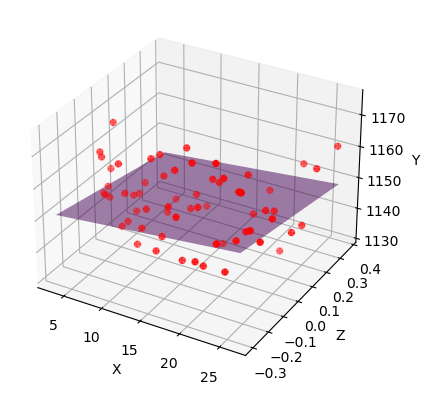

In [113]:
# Données d'exemple (vous devez remplacer ces données par les vôtres)
data = np.array(chgt_coord1(myList[0])) 
x = data[0]
z = data[1]
y = data[2]
    # Créez une grille 3D pour représenter le plan

# Assurez-vous que les données x, z et y sont bidimensionnelles
x = x.reshape(-1, 1)

z = z.reshape(-1, 1)
y = y.reshape(-1, 1)
print("******************","\n",x,"\n","******************","\n","******************",y,"******************","\n","******************","\n","******************","\n","******************",z,"******************","\n","******************")

# Créez une matrice de conception X avec x, z et un vecteur y
X = np.column_stack((x, z, np.ones_like(x)))
print(X)
# Utilisez la formule des moindres carrés pour calculer les coefficients a, b et c
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
a, b, c = coefficients

# Les coefficients a, b et c sont maintenant calculés
print(f"Coefficient a : {a}")
print(f"Coefficient b : {b}")
print(f"Coefficient c : {c}")
def plot_3d_plane(a, b, c, x, z, y):
    
    X, Z = np.meshgrid(np.linspace(min(x), max(x), 8), np.linspace(min(z), max(z), 8))
    Y = a[0] * X + b[0] * Z + c[0]

    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez le plan
    ax.plot_surface(X, Z, Y, alpha=0.5, rstride=100, cstride=100, cmap='viridis')

    # Tracez les points de données
    ax.scatter(x, z, y, color='red', marker='+')
    ax.scatter(data[0], data[1], data[2], c='r', marker='o')
    print(X,"\n","******************",Y,"\n","******************",Z)
    # Définissez les étiquettes des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    # Affichez le graphique
    plt.show()
plot_3d_plane(a, b, c, x, z, y)


[0.23933573] [-11.914579] [1146.823978]


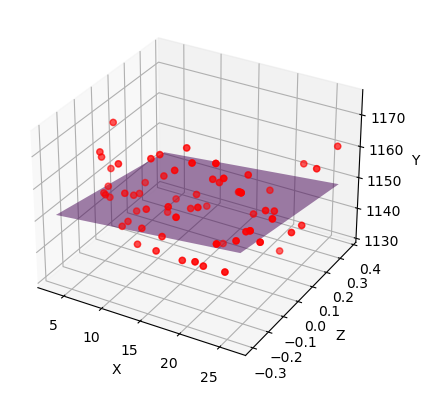

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_plane(a, b, c, x, z, y):
    
    X, Z = np.meshgrid(np.linspace(min(x), max(x), 8), np.linspace(min(z), max(z), 8))
    Y = a * X + b * Z + c

    # Créez une figure 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Tracez le plan
    ax.plot_surface(X, Z, Y, alpha=0.5, rstride=100, cstride=100, cmap='viridis')

    # Tracez les points de données
    ax.scatter(x, z, y, color='red', marker='o')
    ax.scatter(data[0], data[1], data[2], c='r', marker='o')

    # Définissez les étiquettes des axes
    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    # Affichez le graphique
    plt.show()

# Données d'exemple (vous devez remplacer ces données par les vôtres)
data = np.array(chgt_coord1(myList[0])) 
x = data[0]
z = data[1]
y = data[2]
"""x =np.array([1167.70129888, 1154.55587723, 1148.75640699, 1153.32769806, 1142.36261191, 1140.78585083, 1154.55587723 ,1153.78826212])
y = np.array([ 92.60655388,  65.33630298,  38.97842299 , 13.04009103 ,-12.91611437, -38.70797426 ,-65.33630298, -91.50315664])
z = np.array([-92.3184856 , -91.27920833, -90.82070211, -91.18210846, -90.31520855, -90.19054979, -91.27920833, -91.21852066])"""



# Assurez-vous que les données x, z et y sont bidimensionnelles
x = x.reshape(-1, 1)
z = z.reshape(-1, 1)
y = y.reshape(-1, 1)

# Créez une matrice de conception X avec x, z et un vecteur y
X = np.column_stack((x, z, np.ones_like(x)))

# Utilisez la formule des moindres carrés pour calculer les coefficients a, b et c
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
a, b, c = coefficients
print(a,b,c)

plot_3d_plane(a, b, c, x, z, y)
